In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file=pd.read_csv(r'/home/abhishek/Documents/zomato-analysis/zomato.csv')
file

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600.0,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,2000.0,[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


Text(0.5, 0, 'Number of Outlets')

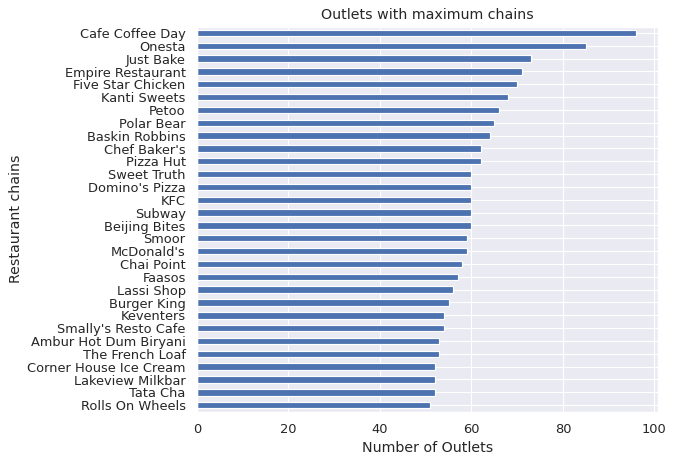

In [164]:
file.isnull().sum()        # showing total number of null values in each column 
df_rest_counts=pd.value_counts(file['name']).to_frame()     #Counting the number of Outlets in Bengaluru and converting it into dataframe
df_rest_counts
df_rest_counts.index.name = 'Restaurant Chains'     # renaming index to 'Restaurant Chains'
df_rest_counts.rename(columns = {'name':'Number of Outlets'},inplace = True)    # renaming column name from 'name' to 'Number of Outlets'
df_rest_counts
rest_top30 = df_rest_counts.iloc[0:30].sort_values('Number of Outlets')
rest_top30
from matplotlib.pyplot import figure
plt.figure(figsize=(7, 6), dpi=85)
rest_top30 ['Number of Outlets'].plot(kind="barh")
plt.title("Outlets with maximum chains")
plt.ylabel("Restaurant chains")
plt.xlabel("Number of Outlets")

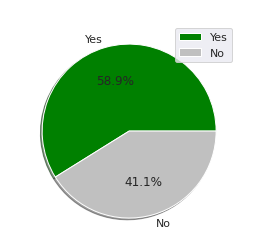

In [165]:
# RESTAURANTS NOT ACCEPTING ONLINE ORDERS
online_orders=pd.value_counts(file['online_order']).to_frame()
online_orders
rest_orders=[30444,21273]
online_orders.index.name = 'Yes/No'     # renaming index to 'Yes/No'
onl_ord=online_orders.transpose()
onl_ord
my_labels = ['Yes', 'No']
my_legends=['Restaurants accepting online orders','Restaurants not accepting online orders']
my_colors = ['Green','silver']
plt.pie(rest_orders, labels=my_labels,autopct='%1.1f%%', shadow = True, colors=my_colors)
plt.title('Resaturants acceptance of online orders',color='white')
plt.legend(loc=0)
plt.show()



In [166]:
# RATINGS DISTRIBUTION

# Extract the ratings
df_rating=file['rate'].to_frame() 

In [167]:
print(df_rating)

         rate
0       4.1/5
1       4.1/5
2       3.8/5
3       3.7/5
4       3.8/5
...       ...
51712  3.6 /5
51713     NaN
51714     NaN
51715  4.3 /5
51716  3.4 /5

[51717 rows x 1 columns]


In [168]:
# Removing Nan values from dataframe
df_rating.dropna(axis=0,inplace=True)
# Removing new restaurants which have no ratings and are marked as 'NEW'
df_rating.drop(df_rating[df_rating['rate']=='NEW'].index,inplace=True)
df_rating

,rate
0,4.1/5
1,4.1/5
2,3.8/5
3,3.7/5
4,3.8/5
...,...
51709,3.7 /5
51711,2.5 /5
51712,3.6 /5
51715,4.3 /5


In [169]:
df_rating.isnull().sum()

rate    0
dtype: int64

In [170]:
rate_col=df_rating["rate"]
print(rate_col)
type(rate_col)

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51709    3.7 /5
51711    2.5 /5
51712    3.6 /5
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 41734, dtype: object


pandas.core.series.Series

In [171]:
new_set1=[]     
for x in rate_col:           # Removing "/5" from all values from rate column
    new_set=x.replace("/5", "")
    new_set1.append(new_set)
type(new_set1)

list

In [172]:
rate_df= pd.DataFrame(new_set1, columns = ['ratings']).sort_values('ratings') # Sorting rate columns in asc order 


In [173]:
# Cleaning the restaurants with '-' values.
# Removing new restaurants which have no ratings and have ratings as '-'
rate_df.drop(rate_df[rate_df['ratings']=='-'].index,inplace=True)

In [174]:
(rate_df['ratings'] == '-').sum()
rate_df.sort_values('ratings')


,ratings
10073,1.8
5138,1.8
35076,1.8
39138,1.8
31256,1.8
...,...
34141,4.9
28166,4.9
24808,4.9
40483,4.9


In [178]:
type(rate_df)

pandas.core.frame.DataFrame

In [177]:
rate_df=rate_df.str.strip()

AttributeError: 'DataFrame' object has no attribute 'str'

In [ ]:
rate_df=rate_df.to_frame()
type(rate_df)

In [ ]:
for ratings in rate_df:
    print(rate_df[ratings].unique())

In [ ]:
# plotting Histogram for restaurant ratings along with Kernel density estimation
from matplotlib.pyplot import figure   
sns.set(style="darkgrid")
plt.figure(figsize=(7,7), dpi=85)
g1=sns.displot(data=rate_df, x="ratings", stat='frequency',kde="True",color="blue")
g1.set(xticklabels=[])
#plt.axvline(x=rate_df.ratings.mean(),color='red',ls='--')
#g1.tick_params(bottom=False)